# Exemplo de utilização da API REST *open weather iot* em Python no Notebook Jupyter

Primeiramente, instalamos o pacote necessário usando o ambiente anaconda: `pandas`.

In [1]:
#!conda install -c anaconda pandas seaborn -y

Importamos a biblioteca necessária: `pandas`:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Agora, fazemos uma requisição *web* para o *endpoint* `/dataseries` no servidor `owi-server.onrender.com`, obtendo uma resposta em JSON da série de dados meteorológicos brutos:

In [18]:
df_weather_data_series = pd.read_json("https://owi-server.onrender.com/dataseries")

Exibimos o dataframe em Pandas:

In [19]:
df_weather_data_series

,_id,measurements,errors,timestamp
0,6399458a73a2fd0034f88431,"{'SYS/power/vsys/voltage': {'raw': 32776, 'val...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 03:39:51.807347037+00:00
1,6399458f73a2fd0034f88432,"{'SYS/power/vsys/voltage': {'raw': 32776, 'val...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 03:39:55.893377020+00:00
2,6399459373a2fd0034f88433,"{'SYS/power/vsys/voltage': {'raw': 32936, 'val...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 03:39:59.969891401+00:00
3,6399459773a2fd0034f88434,"{'SYS/power/vsys/voltage': {'raw': 32936, 'val...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 03:40:04.043722334+00:00
4,6399459b73a2fd0034f88435,"{'SYS/power/vsys/voltage': {'raw': 32904, 'val...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 03:40:08.129934826+00:00
...,...,...,...,...
5756,6399c6b271d4b1003328994c,"{'SYS/cpu/temperature': {'raw': 14147, 'value'...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 12:50:53.869994222+00:00
5757,6399c6b971d4b1003328994d,"{'SYS/cpu/temperature': {'raw': 14131, 'value'...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 12:50:59.481273825+00:00
5758,6399c6bd71d4b1003328994e,"{'SYS/cpu/temperature': {'raw': 14131, 'value'...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 12:51:05.083434485+00:00
5759,6399c6c371d4b1003328994f,"{'SYS/cpu/temperature': {'raw': 14131, 'value'...",[got error `OSError: [Errno 5] EIO` while samp...,2022-12-14 12:51:10.744926991+00:00


Observamos que o formato da coluna `measurements` é JSON. Os sensores disponíveis nessa coluna são os seguintes:

In [20]:
sensors = pd.json_normalize(df_weather_data_series.measurements, max_level=0)
sensors.columns

Index(['SYS/power/vsys/voltage', 'SYS/power/solar_panel/voltage',
       'SYS/power/battery/voltage', 'SYS/cpu/temperature',
       'SYS/power/battery/percentage', 'PT100/temperature',
       'HMC5883L/1/wind_speed', 'HMC5883L/0/wind_direction', 'BME680/humidity',
       'BME680/altitude', 'BME680/gas', 'BME680/temperature',
       'BME680/pressure', 'HDC1080/humidity'],
      dtype='object')

Vamos normalizar a coluna `measurements` para um dataframe:

In [21]:
weather = pd.json_normalize(df_weather_data_series.measurements, sep='/')
weather = pd.concat([weather, df_weather_data_series.timestamp], axis=1, join='inner', copy=False)
weather

,SYS/power/vsys/voltage/raw,SYS/power/vsys/voltage/value,SYS/power/vsys/voltage/unit,SYS/power/solar_panel/voltage/raw,SYS/power/solar_panel/voltage/value,SYS/power/solar_panel/voltage/unit,SYS/power/battery/voltage/raw,SYS/power/battery/voltage/value,SYS/power/battery/voltage/unit,SYS/cpu/temperature/raw,...,BME680/temperature/raw,BME680/temperature/value,BME680/temperature/unit,BME680/pressure/raw,BME680/pressure/value,BME680/pressure/unit,HDC1080/humidity/raw,HDC1080/humidity/value,HDC1080/humidity/unit,timestamp
0,32776,4.951283,V,11874,2.571024,V,16484,1.660096,V,14099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 03:39:51.807347037+00:00
1,32776,4.951283,V,11842,2.564095,V,15795,1.590707,V,14083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 03:39:55.893377020+00:00
2,32936,4.975454,V,12098,2.619525,V,16836,1.695546,V,14099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 03:39:59.969891401+00:00
3,32936,4.975454,V,12098,2.619525,V,16099,1.621323,V,14099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 03:40:04.043722334+00:00
4,32904,4.970620,V,12066,2.612597,V,16484,1.660096,V,14099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 03:40:08.129934826+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,33000,4.985122,V,17092,3.700854,V,41050,4.134127,V,14147,...,NaN,23.30578,ºC,NaN,944.5737,hPa,45084.0,68.79272,% RH,2022-12-14 12:50:53.869994222+00:00
5757,32968,4.980288,V,18500,4.005722,V,41034,4.132515,V,14131,...,NaN,23.30598,ºC,NaN,944.5758,hPa,45084.0,68.79272,% RH,2022-12-14 12:50:59.481273825+00:00
5758,32856,4.963369,V,18516,4.009186,V,40953,4.124358,V,14131,...,NaN,23.30578,ºC,NaN,944.5703,hPa,45152.0,68.89648,% RH,2022-12-14 12:51:05.083434485+00:00
5759,32968,4.980288,V,17332,3.752820,V,41098,4.138961,V,14131,...,NaN,23.30578,ºC,NaN,944.5652,hPa,45084.0,68.79272,% RH,2022-12-14 12:51:10.744926991+00:00


Vamos selecionar apenas as colunas que contém o valor e unidade de medida da temperatura da CPU do sistema:

In [22]:
weather[['SYS/cpu/temperature/value', 'SYS/cpu/temperature/unit']]

,SYS/cpu/temperature/value,SYS/cpu/temperature/unit
0,24.70368,ºC
1,25.17182,ºC
2,24.70368,ºC
3,24.70368,ºC
4,24.70368,ºC
...,...,...
5756,23.29925,ºC
5757,23.76739,ºC
5758,23.76739,ºC
5759,23.76739,ºC


A média da temperatura da CPU do sistema é:

In [8]:
weather['SYS/cpu/temperature/value'].mean()

23.948743130872543

A média da temperatura da CPU e da voltagem do sistema (calcular a média de diversas colunas simultaneamente) é:

In [9]:
weather[['SYS/cpu/temperature/value', 'SYS/power/vsys/voltage/value']].mean()

SYS/cpu/temperature/value       23.948743
SYS/power/vsys/voltage/value     4.977296
dtype: float64

Podemos também fazer um gráfico da variação da temperatura da CPU:

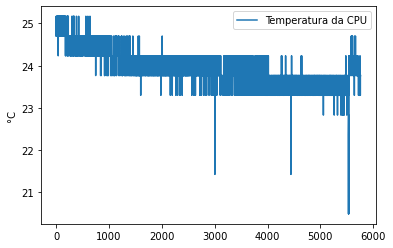

In [23]:
g = sns.lineplot(data=weather[['SYS/cpu/temperature/value']])
g.set_ylabel('°C')
g.legend(loc='upper right', labels=['Temperatura da CPU'])

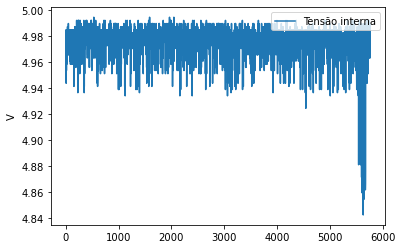

In [24]:
g = sns.lineplot(data=weather[['SYS/power/vsys/voltage/value']])
g.set_ylabel('V')
g.legend(loc='upper right', labels=['Tensão interna'])

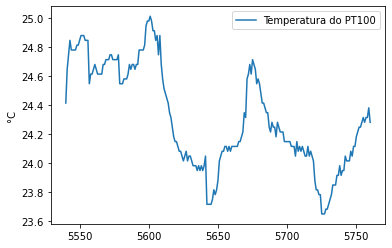

In [25]:
g = sns.lineplot(data=weather[['PT100/temperature/value']])
g.set_ylabel('°C')
g.legend(loc='upper right', labels=['Temperatura do PT100'])